## Introduction
Machine learning in general can be divided into three distinct groups

![image](Ml.png)

Reinforcement learning is a distinct category of machine learning that looks at the training of an agent to take actions in an environment. The agent is trained through a set of rewards and penalties. Reinforcement learning is popular in areas such as gaming and robotics. 

In supervised learning, a model is provided with examples of each class. It is trained to learn the best mapping of the input to the output, and can consequently be used in tasks such as classification and regression.  

In unsupervised learning the training data is unlabelled. In supervised learning, we start off knowing the groups or categories that each data element belongs to. In unsupervised learning, the goal is to discover these categories. 


#### some applications of unsupervised learning
1. Market segmentation for targeting appropriate customers
2. anomaly/fraud detection in banking sectors
3. gene clustering for grouping genes with similar expression levels


## Implementation of K-means Clustering 
### Introduction
K- Means clustering algorithm is one of the most popular clustering techniques. It produces hard, flat and  polythetic clusters:
##### Hard vs Soft Clusters
In hard clustering, the members of a subgroup can only belong to one group. In soft clustering, members can belong to multiple subgroups with a varying degree of strength.
##### Monothetic vs Polythetic Clustering
Monothetic clusters are those where membership in a cluster is determined by the absence or presence of a single attribute. Polythetic clustering uses more than one variable.



The K-Means algorithm works by creating clusters around centroids.
K-Means requires us to specify the number of clusters as a variable (K). It is important to note that the number of clusters specified greatly affects the performance of the K-means algorithm. Deciding the number of clusters can be informed by domain knowledge. In situations where this is not available there are two techniques we can use to help us decide on the right  number of clusters.


### Deciding the number of clusters
Deciding the number of clusters can be informed by domain knowledge. In situations where this is not available there are two techniques we can use to help us decide on the right  number of clusters.


1. Exploratory Data Analysis using Scatter Plots
2. Elbow Method

## How it works: 

1. Start by specifying the number of clusters as an input K
2. Initialize K random centroids based on data points in your data.
3. Repeat:
    a. Cluster assignment: 
        i. For each point, find the nearest centroid and assign it to that cluster. To find the nearest centroid use one of the distance metrics discussed above such as Euclidean Distance. 
    b. Move Centroid: 
        i. Adjust each centroid so that it minimizes within cluster variance. (e.g the mean)
4. Stop after a predetermined number of iterations or after Cluster Assignment stops making any changes.


#### flowchart
![image](flowchart.png)

## Example

Assume 

![image](Med.png)

![image](Med2.png)

Picking the centroids

![image](Med3.png)

Iterative stage

![image](iter1.png)

![image](medlast.png)


## Implementation in R


#### Dataset:
For this exercise, we will use a publicly available dataset that looks at the arrests per state within the US in 1973. The data has 4 columns and 50 rows 

In [1]:
 
if(!require(devtools)) install.packages("devtools")
devtools::install_github("kassambara/factoextra")
 

##load libraries
library(cluster)   
library(factoextra) # used 4 visualization unlike earlier where we used it for correlation 


Loading required package: devtools
Warning message:
"package 'devtools' was built under R version 3.6.1"Loading required package: usethis
Warning message:
"package 'usethis' was built under R version 3.6.1"Skipping install of 'factoextra' from a github remote, the SHA1 (1012e1b5) has not changed since last install.
  Use `force = TRUE` to force installation
Loading required package: ggplot2
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


In [2]:
#load data
df <- USArrests


In [3]:
#Remove any missing data
df <-  na.omit(df)

In [4]:
#Scale and standardize the data using the R scale function
df <- scale(df)

In [5]:

k3 <- kmeans(df, centers = 3, nstart = 20)
str(k3)


List of 9
 $ cluster     : Named int [1:50] 3 3 3 2 3 3 2 2 3 3 ...
  ..- attr(*, "names")= chr [1:50] "Alabama" "Alaska" "Arizona" "Arkansas" ...
 $ centers     : num [1:3, 1:4] -0.962 -0.447 1.005 -1.107 -0.347 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:3] "1" "2" "3"
  .. ..$ : chr [1:4] "Murder" "Assault" "UrbanPop" "Rape"
 $ totss       : num 196
 $ withinss    : num [1:3] 12 19.6 46.7
 $ tot.withinss: num 78.3
 $ betweenss   : num 118
 $ size        : int [1:3] 13 17 20
 $ iter        : int 2
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"






##### Printing out the kmeans object as in the example above returns the following elements.
1.
cluster - 
A vector of integers (from 1:k) indicating the cluster to which each point is allocated.

2.
centers - 
A matrix of cluster centres.

3.
totss - 
Total sum of squares.

4.
withinss - 
Vector of within-cluster sum of squares, one component per cluster.

5.
tot.withinss - 
Total within-cluster sum of squares, i.e. sum(withinss).

6.
betweenss - 
The between-cluster sum of squares, i.e. totss-tot.withinss.

7.
size - 
The number of points in each cluster.

8.
iter - 
The number of (outer) iterations.

9
ifault - 
integer: indicator of a possible algorithm problem – for experts.










In [6]:
k3

K-means clustering with 3 clusters of sizes 13, 17, 20

Cluster means:
      Murder    Assault   UrbanPop       Rape
1 -0.9615407 -1.1066010 -0.9301069 -0.9667633
2 -0.4469795 -0.3465138  0.4788049 -0.2571398
3  1.0049340  1.0138274  0.1975853  0.8469650

Clustering vector:
       Alabama         Alaska        Arizona       Arkansas     California 
             3              3              3              2              3 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             3              2              2              3              3 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             2              1              3              2              1 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             2              1              3              1              3 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             2              3            

In [7]:
##devtools::install_github("r-lib/rlang", build_vignettes = TRUE)
#solves the below error
# installs rlang package


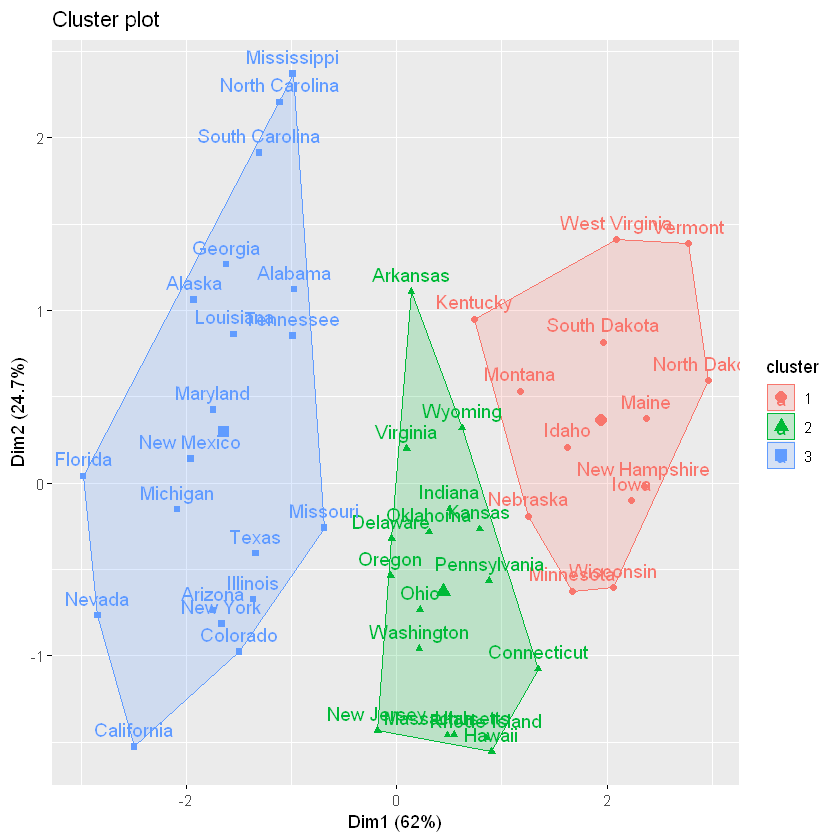

In [8]:
fviz_cluster(k3, data = df)

Expected output

![image](Med.png)